In [12]:
import zipfile
import os

dataset_zip_path = '/content/intel-image-classification.zip'
dataset_dir = '/content/intel-image-classification'

# Create the target directory if it doesn't exist
os.makedirs(dataset_dir, exist_ok=True)

try:
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)
    print(f"Dataset extracted to {dataset_dir}")
except FileNotFoundError:
    print(f"Error: Zip file not found at {dataset_zip_path}. Please ensure you have manually uploaded 'intel-image-classification.zip' to /content/")
except Exception as e:
    print(f"An error occurred during extraction: {e}")

Error: Zip file not found at /content/intel-image-classification.zip. Please ensure you have manually uploaded 'intel-image-classification.zip' to /content/


In [13]:
import os

print("Contents of /content/ directory:")
print(os.listdir('/content/'))

# Also check for intel-image-classification.zip specifically
if 'intel-image-classification.zip' in os.listdir('/content/'):
    print("intel-image-classification.zip found in /content/")
else:
    print("intel-image-classification.zip NOT found in /content/")
    print("Please ensure you have manually uploaded the 'intel-image-classification.zip' file to /content/.")

Contents of /content/ directory:
['.config', 'archive.zip', 'seg_pred.zip', 'intel-image-classification', '~', 'sample_data']
intel-image-classification.zip NOT found in /content/
Please ensure you have manually uploaded the 'intel-image-classification.zip' file to /content/.


In [14]:
import os

dataset_dir = '/content/intel-image-classification'

print(f"Contents of {dataset_dir} directory:")

if os.path.exists(dataset_dir):
    for root, dirs, files in os.walk(dataset_dir):
        level = root.replace(dataset_dir, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        # Limit printing files to avoid excessive output
        if level < 2: # Print files for top two levels only
            for f in files:
                print(f'{indent}    {f}')
        elif len(dirs) == 0 and len(files) > 0: # Print files for leaf directories
             print(f'{indent}    ... ({len(files)} files)')
else:
    print(f"Directory {dataset_dir} does not exist. Please ensure the dataset is extracted or present.")


Contents of /content/intel-image-classification directory:
intel-image-classification/


In [15]:
from google.colab import files
import os

print("It appears the dataset zip file 'intel-image-classification.zip' is still not present or accessible.")
print("Please manually upload the 'intel-image-classification.zip' file now into the /content/ directory.")
print("You can obtain this file from Kaggle by downloading the 'Intel Image Classification' dataset.")

files.upload()

# Verify if the file was uploaded
if 'intel-image-classification.zip' in os.listdir('/content/'):
    print("intel-image-classification.zip successfully uploaded.")
    print("Now, run the extraction cell again to unpack the dataset.")
else:
    print("Error: 'intel-image-classification.zip' was not found in /content/ after upload. Please try again or check the filename.")

It appears the dataset zip file 'intel-image-classification.zip' is still not present or accessible.
Please manually upload the 'intel-image-classification.zip' file now into the /content/ directory.
You can obtain this file from Kaggle by downloading the 'Intel Image Classification' dataset.


Error: 'intel-image-classification.zip' was not found in /content/ after upload. Please try again or check the filename.


In [16]:
import zipfile
import os

# Define the path to the zip file and the extraction directory
dataset_zip_path = '/content/archive.zip'
dataset_dir = '/content/intel-image-classification'

# Create the target directory if it doesn't exist
os.makedirs(dataset_dir, exist_ok=True)

try:
    # Extract the contents of the zip file
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)
    print(f"Dataset extracted successfully to {dataset_dir}")
except FileNotFoundError:
    print(f"Error: Zip file not found at {dataset_zip_path}. Please ensure it is present in /content/")
except Exception as e:
    print(f"An error occurred during extraction: {e}")

Dataset extracted successfully to /content/intel-image-classification


In [12]:
import os

dataset_dir = '/content/intel-image-classification'

# Initialize variables to store paths
train_dir = None
test_dir = None
pred_dir = None

print(f"Inspecting directory structure of: {dataset_dir}")

# Recursively list directory contents to a limited depth
for root, dirs, files in os.walk(dataset_dir):
    level = root.replace(dataset_dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')

    # Identify key subdirectories for future use
    if os.path.basename(root) == 'seg_train':
        train_dir = root
    elif os.path.basename(root) == 'seg_test':
        test_dir = root
    elif os.path.basename(root) == 'seg_pred':
        pred_dir = root

    # Limit printing files to avoid excessive output, print only for top levels or if few files
    if level < 2 or (level == 2 and (len(files) < 10 or len(dirs) == 0)):
        for f in files:
            print(f'{indent}    {f}')
    elif level == 2 and len(files) >= 10:
        print(f'{indent}    ... ({len(files)} files)')

print('\n--- Identified Dataset Paths ---')
print(f"Training Data Directory: {train_dir}")
print(f"Test Data Directory: {test_dir}")
print(f"Prediction Data Directory (if any): {pred_dir}")

if train_dir and test_dir:
    print("Key dataset directories found. Proceeding with data loading.")
else:
    print("Warning: One or more key dataset directories (seg_train, seg_test) were not found. Please verify the extraction.")

Inspecting directory structure of: /content/intel-image-classification
intel-image-classification/
    seg_pred/
        seg_pred/
            20506.jpg
            9976.jpg
            20786.jpg
            15485.jpg
            11752.jpg
            5245.jpg
            11000.jpg
            2899.jpg
            17988.jpg
            9786.jpg
            18858.jpg
            19181.jpg
            4127.jpg
            15349.jpg
            4101.jpg
            2133.jpg
            23790.jpg
            19432.jpg
            24194.jpg
            19707.jpg
            21952.jpg
            2642.jpg
            22940.jpg
            14919.jpg
            21938.jpg
            15391.jpg
            14653.jpg
            4353.jpg
            9864.jpg
            6.jpg
            20302.jpg
            24302.jpg
            5361.jpg
            23863.jpg
            11488.jpg
            8158.jpg
            2844.jpg
            20442.jpg
            5430.jpg
            20604.jpg
       

In [13]:
import tensorflow as tf
import collections
import os

# Define the base directory for the extracted dataset
dataset_base_dir = '/content/intel-image-classification'

# Define paths for training and testing data based on the inspected structure
train_data_dir = os.path.join(dataset_base_dir, 'seg_train', 'seg_train')
test_data_dir = os.path.join(dataset_base_dir, 'seg_test', 'seg_test')

# Image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

print(f"Loading training data from: {train_data_dir}")
print(f"Loading test data from: {test_data_dir}")

# Load training dataset and create a validation split
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    validation_split=0.2,
    subset='training',
    seed=42,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    validation_split=0.2,
    subset='validation',
    seed=42,
    batch_size=batch_size
)

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    shuffle=False, # No need to shuffle test data
    batch_size=batch_size
)

# Extract class names
class_names = train_ds.class_names
print(f"\nClass Names: {class_names}")
print(f"Number of classes: {len(class_names)}")
print("Datasets loaded successfully.")

Loading training data from: /content/intel-image-classification/seg_train/seg_train
Loading test data from: /content/intel-image-classification/seg_test/seg_test
Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Found 3000 files belonging to 6 classes.

Class Names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Number of classes: 6
Datasets loaded successfully.


In [15]:
import collections
import numpy as np

def count_class_distribution(dataset, class_names):
    """
    Counts the number of images per class in a tf.data.Dataset.

    Args:
        dataset (tf.data.Dataset): The dataset to analyze.
        class_names (list): A list of class names.

    Returns:
        collections.Counter: A Counter object with class-wise image counts.
    """
    class_counts = collections.Counter()
    for _, labels in dataset:
        # Ensure labels are numpy arrays for easier processing
        # Wrap the scalar label in a list as update expects an iterable
        class_counts.update([labels.numpy()])

    # Map integer labels back to class names for readability
    named_class_counts = {class_names[k]: v for k, v in class_counts.items()}
    return named_class_counts

print("Calculating class distribution for training dataset...")
train_class_dist = count_class_distribution(train_ds.unbatch(), class_names)
print("Training Class Distribution:")
for class_name, count in sorted(train_class_dist.items()):
    print(f"  {class_name}: {count}")

print("\nCalculating class distribution for validation dataset...")
val_class_dist = count_class_distribution(val_ds.unbatch(), class_names)
print("Validation Class Distribution:")
for class_name, count in sorted(val_class_dist.items()):
    print(f"  {class_name}: {count}")

print("\nCalculating class distribution for test dataset...")
test_class_dist = count_class_distribution(test_ds.unbatch(), class_names)
print("Test Class Distribution:")
for class_name, count in sorted(test_class_dist.items()):
    print(f"  {class_name}: {count}")


Calculating class distribution for training dataset...
Training Class Distribution:
  buildings: 1761
  forest: 1835
  glacier: 1931
  mountain: 1998
  sea: 1797
  street: 1906

Calculating class distribution for validation dataset...
Validation Class Distribution:
  buildings: 430
  forest: 436
  glacier: 473
  mountain: 514
  sea: 477
  street: 476

Calculating class distribution for test dataset...
Test Class Distribution:
  buildings: 437
  forest: 474
  glacier: 553
  mountain: 525
  sea: 510
  street: 501


In [16]:
import tensorflow as tf

# 1. Verify image dimensions
print("\n--- Verifying Image Dimensions ---")
for image_batch, labels_batch in train_ds.take(1):
    print(f"Train Batch Shape (Images): {image_batch.shape}")
    print(f"Train Batch Shape (Labels): {labels_batch.shape}")

for image_batch, labels_batch in val_ds.take(1):
    print(f"Validation Batch Shape (Images): {image_batch.shape}")
    print(f"Validation Batch Shape (Labels): {labels_batch.shape}")

for image_batch, labels_batch in test_ds.take(1):
    print(f"Test Batch Shape (Images): {image_batch.shape}")
    print(f"Test Batch Shape (Labels): {labels_batch.shape}")

# Expected image shape: (batch_size, img_height, img_width, 3)
# Expected labels shape: (batch_size,)

# 2. Confirm number of batches and total images
print("\n--- Confirming Dataset Splits ---")

train_num_images = tf.data.experimental.cardinality(train_ds).numpy() * batch_size
val_num_images = tf.data.experimental.cardinality(val_ds).numpy() * batch_size
test_num_images = tf.data.experimental.cardinality(test_ds).numpy() * batch_size

print(f"Total training images (approx): {train_num_images}")
print(f"Total validation images (approx): {val_num_images}")
print(f"Total test images (approx): {test_num_images}")

print(f"Number of batches in training dataset: {tf.data.experimental.cardinality(train_ds).numpy()}")
print(f"Number of batches in validation dataset: {tf.data.experimental.cardinality(val_ds).numpy()}")
print(f"Number of batches in test dataset: {tf.data.experimental.cardinality(test_ds).numpy()}")

# 3. Apply .cache() and .prefetch()
print("\n--- Applying Caching and Prefetching ---")
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Datasets cached and prefetched for optimized performance.")


--- Verifying Image Dimensions ---
Train Batch Shape (Images): (32, 150, 150, 3)
Train Batch Shape (Labels): (32,)
Validation Batch Shape (Images): (32, 150, 150, 3)
Validation Batch Shape (Labels): (32,)
Test Batch Shape (Images): (32, 150, 150, 3)
Test Batch Shape (Labels): (32,)

--- Confirming Dataset Splits ---
Total training images (approx): 11232
Total validation images (approx): 2816
Total test images (approx): 3008
Number of batches in training dataset: 351
Number of batches in validation dataset: 88
Number of batches in test dataset: 94

--- Applying Caching and Prefetching ---
Datasets cached and prefetched for optimized performance.


In [17]:
import tensorflow as tf

# 1. Define a normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)
print("Normalization layer defined (rescaling to [0, 1]).")

# 2. Define a data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])
print("Data augmentation layer defined (random flip, rotation, zoom).")

# 3. Apply the normalization layer to all datasets
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)
print("Normalization applied to training, validation, and test datasets.")

# 4. Apply the data augmentation layer to the training dataset only
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE)
print("Data augmentation applied to the training dataset.")

# 5. Print a confirmation message
print("Preprocessing (normalization) and data augmentation applied to the respective datasets.")

Normalization layer defined (rescaling to [0, 1]).
Data augmentation layer defined (random flip, rotation, zoom).
Normalization applied to training, validation, and test datasets.
Data augmentation applied to the training dataset.
Preprocessing (normalization) and data augmentation applied to the respective datasets.


In [18]:
from tensorflow.keras import layers, models


model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),


    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


print("Model architecture:")
model.summary()

epochs = 10

print(f"\nTraining the model for {epochs} epochs...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

print("Model training complete.")

Model architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,036,742 (72.62 MB)

 Trainable params: 19,036,742 (72.62 MB)

 Non-trainable params: 0 (0.00 B)


Training the model for 10 epochs...
Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 69s 179ms/step - accuracy: 0.4237 - loss: 1.3940 - val_accuracy: 0.5417 - val_loss: 1.2096
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 53s 151ms/step - accuracy: 0.6043 - loss: 1.0019 - val_accuracy: 0.7017 - val_loss: 0.7905
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 54s 152ms/step - accuracy: 0.6561 - loss: 0.9166 - val_accuracy: 0.7259 - val_loss: 0.7321
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 82s 153ms/step - accuracy: 0.6857 - loss: 0.8535 - val_accuracy: 0.7113 - val_loss: 0.7608
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 52s 149ms/step - accuracy: 0.7158 - loss: 0.7847 - val_accuracy: 0.7263 - val_loss: 0.7507
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 53s 151ms/step - accuracy: 0.7284 - loss: 0.7408 - val_accuracy: 0.7655 - val_loss: 0.6515
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 54s 153ms/step - accuracy: 0.7412 - loss: 0.7063 - val_accuracy: 0.7698 - val_loss: 0.6166
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 54s 15

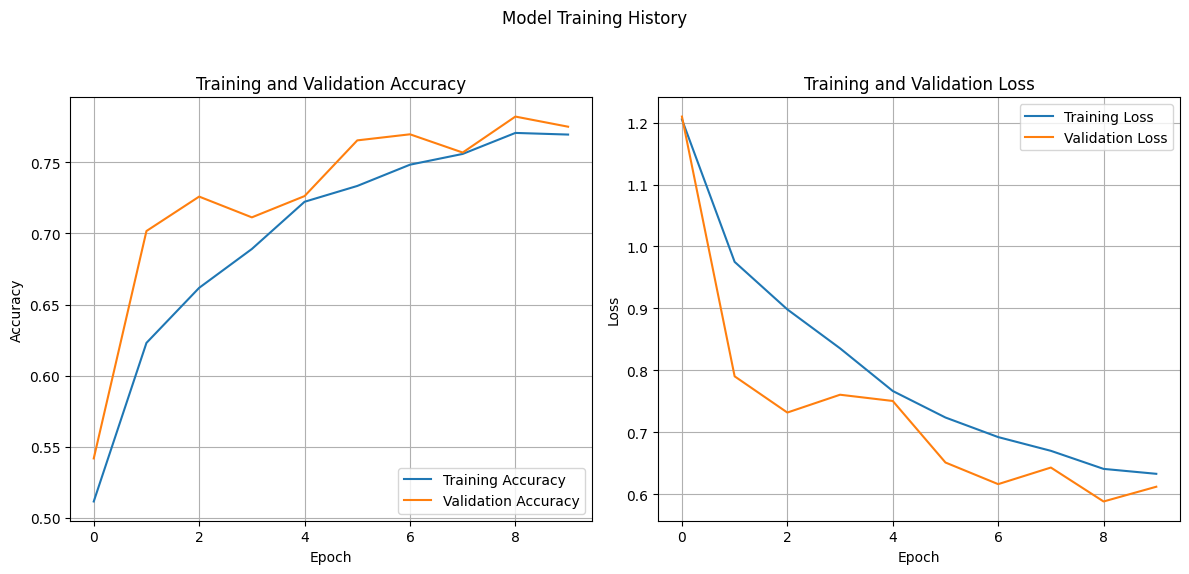

Training and validation performance plots displayed.


In [19]:
import matplotlib.pyplot as plt

# Get training history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.suptitle('Model Training History')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()
print("Training and validation performance plots displayed.")

In [20]:
print("\n--- Evaluating Model on Test Dataset ---")
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


--- Evaluating Model on Test Dataset ---
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.7635 - loss: 0.6464
Test Loss: 0.6480
Test Accuracy: 0.7693


In [21]:
import os

# Define the path to save the model
model_save_path = '/content/cnn_intel_image_classification_model.keras'

# Save the trained model
model.save(model_save_path)

print(f"Model saved successfully to: {model_save_path}")

# Optionally, verify the saved model exists
if os.path.exists(model_save_path):
    print("Model file confirmed to exist.")
else:
    print("Error: Model file not found after saving.")

Model saved successfully to: /content/cnn_intel_image_classification_model.keras
Model file confirmed to exist.
